In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titanic.csv", usecols = ['Survived','Age','Fare','Sex','Pclass','Embarked','sibsp','Parch'])

## Data Overview

In [3]:
df.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1309 non-null   float64
 1   Fare      1309 non-null   float64
 2   Sex       1309 non-null   int64  
 3   sibsp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Pclass    1309 non-null   int64  
 6   Embarked  1307 non-null   float64
 7   Survived  1309 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 81.9 KB


In [5]:
df.describe()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1307.000000,1309.000000
mean,29.503186,33.281086,0.355997,0.498854,0.385027,2.294882,1.492731,0.261268
std,12.905241,51.741500,0.478997,1.041658,0.865560,0.837836,0.814626,0.439494
min,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,22.000000,7.895800,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000
75%,35.000000,31.275000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000
max,80.000000,512.329200,1.000000,8.000000,9.000000,3.000000,2.000000,1.000000


In [6]:
df.shape

(1309, 8)

In [7]:
df.isnull().sum()

Age         0
Fare        0
Sex         0
sibsp       0
Parch       0
Pclass      0
Embarked    2
Survived    0
dtype: int64

In [10]:
df.columns

Index(['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked',
       'Survived'],
      dtype='object')

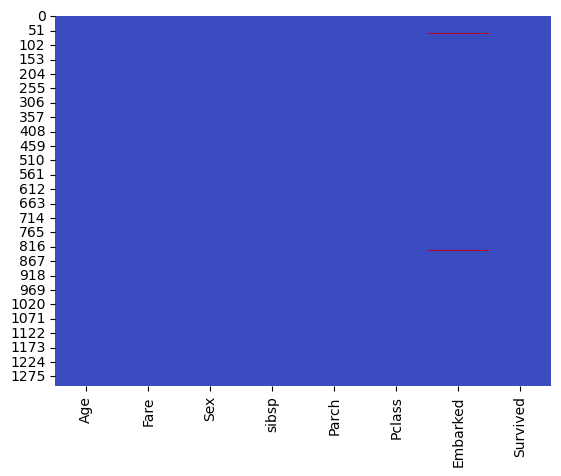

In [9]:
sns.heatmap(df.isnull(), cbar =False, cmap ='coolwarm')
plt.show()

In [13]:
df.duplicated().sum()

np.int64(209)

## Missing Value Analysis

In [17]:
df.nunique()

Age          98
Fare        281
Sex           2
sibsp         7
Parch         8
Pclass        3
Embarked      3
Survived      2
dtype: int64

In [18]:
miss_value_percent = df.isnull().sum()/len(df) * 100

In [20]:
miss_value_percent

Age         0.000000
Fare        0.000000
Sex         0.000000
sibsp       0.000000
Parch       0.000000
Pclass      0.000000
Embarked    0.152788
Survived    0.000000
dtype: float64

In [27]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\Win 11\AppData\Local\Temp\ipykernel_3876\3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [28]:
df.isnull().sum()

Age         0
Fare        0
Sex         0
sibsp       0
Parch       0
Pclass      0
Embarked    0
Survived    0
dtype: int64

### No Missing Values In Dataset

# Univariate Analysis

### Age Count

In [32]:
df['Age'].describe()

count    1309.000000
mean       29.503186
std        12.905241
min         0.170000
25%        22.000000
50%        28.000000
75%        35.000000
max        80.000000
Name: Age, dtype: float64

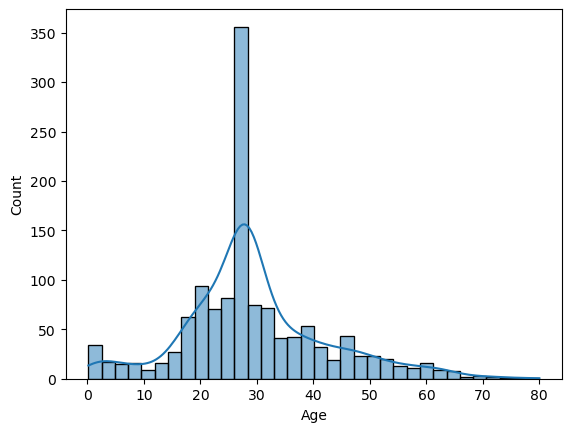

In [33]:
sns.histplot(df['Age'], kde=True)
plt.show()

#### Observation: most of the people are between age 20 to 30 and more than 350 people out of 1309 are ~29.

### Fare Count/Analysis 

In [40]:
df['Fare'].describe()

count    1309.000000
mean       33.281086
std        51.741500
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

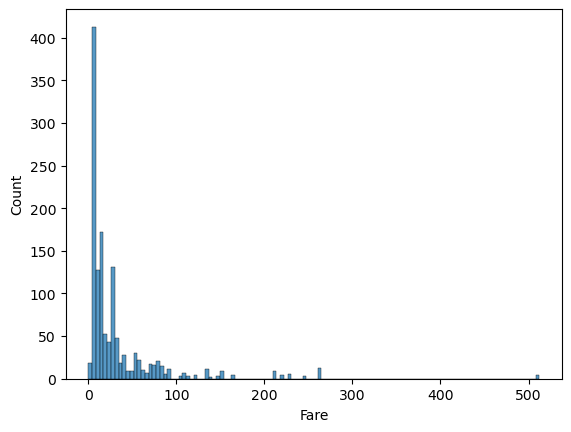

In [41]:
sns.histplot(data = df, x = 'Fare')
plt.show()

### Gender count

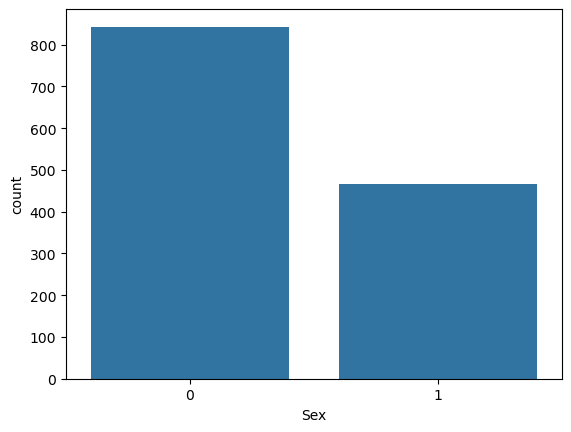

In [44]:
sns.countplot(data = df, x = 'Sex')
plt.show()

In [56]:
df.groupby(['Sex','Pclass']).size()

Sex  Pclass
0    1         179
     2         171
     3         493
1    1         144
     2         106
     3         216
dtype: int64

In [59]:
df['sibsp'].value_counts()

sibsp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64

In [60]:
df['Parch'].value_counts()

Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64